In [1]:
import pandas as pd
import numpy as np
##read the data ##
tweets = pd.read_csv("tweets_metrics.csv",encoding='latin-1').rename({'created at': 'created_at'}, axis=1)
users = pd.read_csv("users_metrics.csv",encoding='latin-1')

In [2]:
tweets["shared_geo_location"] = tweets.apply(lambda row: 0 if (type(row.geo) is float) else 1, axis = 1) 
##if null so it is zero#

In [3]:
#count the hashtags ##
tweets["hashtag_count"] = tweets.apply(lambda row: row.hashtags.count('text'), axis = 1)

In [4]:
##  device is pc or mobile #
tweets["device"] = tweets.apply(lambda row: 'PC' if ('Twitter for Websites' in row.source or 'Twitter Web Client' in row.source) else 'mobile', axis = 1)

In [5]:
##count the number of words in tweet##

tweets["word_count"] = tweets.apply(lambda row: len(row.text.split()), axis = 1)


In [6]:
tweets

,user_id,tweet_id,text,created_at,entities,hashtags,source,geo,is_quote_status,retweet_count,lang,shared_geo_location,hashtag_count,device,word_count
0,1.367900e+04,1320000000000000000,@hassankhan Very likely! The pattern is usuall...,Wed Oct 28 06:09:25 +0000 2020,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,False,0.0,en,0,0,mobile,19
1,1.367900e+04,1330000000000000000,"Over the past 8 months, HHS &amp; CDC has been...",Tue Nov 17 18:44:07 +0000 2020,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,False,0.0,en,0,0,mobile,21
2,1.367900e+04,1330000000000000000,The Open Government Data Act signed into law b...,Tue Nov 17 18:44:07 +0000 2020,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,False,0.0,en,0,0,mobile,23
3,1.367900e+04,1330000000000000000,I often get asked if there are any *legal* or ...,Tue Nov 17 18:44:07 +0000 2020,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,False,0.0,en,0,0,mobile,21
4,1.367900e+04,1330000000000000000,My last plea. Before handing the baton to the ...,Tue Nov 17 19:02:10 +0000 2020,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,True,6.0,en,0,0,mobile,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77447,4.924419e+09,1002220223926290000,RT @TheUndefeated: ?? @IvoryLatta12 and ...,Thu May 31 16:08:16 +0000 2018,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""http://www.hootsuite.com"" rel=""nofoll...",NaN,False,63.0,en,0,0,mobile,19
77448,4.924419e+09,1001504079909150000,"RT @WNBA: These ""Power is Female"" Nike Kyrie 4...",Tue May 29 16:42:34 +0000 2018,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""http://www.hootsuite.com"" rel=""nofoll...",NaN,False,103.0,en,0,0,mobile,14
77449,4.924419e+09,1000385755338890000,RT @kobebryant: Get em lil sis ??¾ #goldm...,Sat May 26 14:38:44 +0000 2018,"{""hashtags"": [{""text"": ""goldmamba"", ""indices"":...","[{""text"": ""goldmamba"", ""indices"": [34, 44]}]","<a href=""http://www.hootsuite.com"" rel=""nofoll...",NaN,True,793.0,en,0,1,mobile,9
77450,4.924419e+09,999843655451070000,We got u @sarahksilverman! What size?? B our g...,Fri May 25 02:44:38 +0000 2018,"{""hashtags"": [{""text"": ""WNBA"", ""indices"": [55,...","[{""text"": ""WNBA"", ""indices"": [55, 60]}, {""text...","<a href=""http://www.hootsuite.com"" rel=""nofoll...",NaN,True,35.0,en,0,4,mobile,23


In [7]:
##count the number of words in description##
users['Num_words_in_desc'] = users.apply(lambda row: 0 if(type(row.description) is float) else len(row.description.split()), axis = 1)

In [8]:
## if someone have more then 100000 foloowers he is celebrity ##
users['Is_celeb'] = users.apply(lambda row: 1 if(int(row.followers_count) > 100000) else 0, axis = 1)

In [9]:
## check how much tweets are collected from each user ##
ids = users.user_id
Collected_tweets = []
for Id in ids:
    Collected_tweets.append(len(tweets.loc[tweets.user_id == Id]))
users['Collected_tweets'] = Collected_tweets


In [10]:
##what is the precent of tweets that collected ##
users['Collected_tweets_percent'] = users.apply(lambda row: row.Collected_tweets / row.statuses_count, axis = 1)

In [11]:
users

,user_id,name,screen_name,location,description,entities,protected,followers_count,friends_count,listed_count,favourites_count,geo_enabled,statuses_count,shared_location,shared_profile_picture,desc_words_Count,Num_words_in_desc,Is_celeb,Collected_tweets,Collected_tweets_percent
0,455531480,New Backyard,NewBackyard,NaN,"Smart, stylish technology and design. Current ...","{""url"": {""urls"": [{""url"": ""https://t.co/iZcaoX...",0,3031,4730,82,663,1,1043,0,1,7,7,0,64,0.061361
1,1322535270,Hamryandhy,AndhyNautika,Jakarta,Tdk yg lebih bagus selain menjdi dri sndiri,"{""description"": {""urls"": []}}",0,20,41,0,3,0,49,1,1,8,8,0,8,0.163265
2,2871787893,The Big Informer,Selfiebuzz,"Arizona, USA",Keeping The Public Up To Date With Today's Tec...,"{""url"": {""urls"": [{""url"": ""https://t.co/FTIi1Z...",0,66799,64870,65,763,0,171,1,1,16,16,0,136,0.795322
3,701561502,Abby Pena,AbbyPena5,"Lake Jackson, Tx",Idk how too use this lol .,"{""url"": {""urls"": [{""url"": ""http://t.co/OHKIaVw...",0,33,53,0,0,0,1,1,1,7,7,0,2,2.000000
4,321589427,Stephen Walt,stephenWalt,"Brookline, MA","Professor of International Affairs, Harvard Ke...","{""description"": {""urls"": []}}",0,70804,588,1361,2387,0,8934,1,1,22,22,0,392,0.043877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,2634686733,Alex Wilson,alexsexybish,NaN,cheer star!â­ï¸,"{""description"": {""urls"": []}}",0,43,21,0,30,0,51,0,1,2,2,0,84,1.647059
594,566826696,Noam Levy,NoamLevy,Israel,NaN,"{""description"": {""urls"": []}}",0,37,22,0,33,0,6,1,1,1,0,0,10,1.666667
595,1445627036,Setiawan juventini,EkhaJuventini,"Semarang, asal garut","Trust me I'm a juventini, born october 15 1992...","{""description"": {""urls"": []}}",0,9,50,0,16,0,397,1,1,18,18,0,14,0.035264
596,141711645,Abel Pintos,AbelPintos,Argentina,* EL HECHIZO * Nueva canciÃ³n / mis canciones ...,"{""url"": {""urls"": [{""url"": ""https://t.co/LiedIe...",0,1716012,166,1369,539,0,21972,1,1,15,15,1,2,0.000091


In [12]:
import datetime
temptweets = tweets.copy(deep=True)
temptweets.dropna(subset = ['created_at'], inplace=True)## drop what is null#
temptweets.drop(temptweets.loc[temptweets['created_at']=="-"].index, inplace=True)## drop what is empty\"-"#
temptweets['created_at']=temptweets['created_at'].astype('datetime64[ns]').apply(lambda row: row.strftime("%x")).astype('datetime64[ns]')# cast it into datetime  do it in m/d/y ##
temptweets['year']= temptweets['created_at'].apply(lambda row: row.strftime("%Y"))#get the year##
temptweets['month']= temptweets['created_at'].apply(lambda row: row.strftime("%b"))#get the mounth ##
temptweets['mobile']= temptweets['device'].apply(lambda row: 1 if (row=="mobile" ) else 0)#the device will be 1 if mobile will use it later ##

temptweets['quoted']= temptweets['is_quote_status'].apply(lambda row: 1 if (row=="True" ) else 0)# if it was quted it will be 1#

#all of this dataframe is temp ##

In [13]:
## agg according to user and year+month ##
tweets_mothly_summary = temptweets.groupby(['user_id','year','month']).agg(
{
"tweet_id": "count",
"hashtag_count":"sum",
"mobile":"sum",
'retweet_count': 'sum',
'shared_geo_location':'sum',
'quoted' :'sum',
    }).reset_index() ##agg according id year and month ##


tweets_mothly_summary.columns = ['user_id','Year','Month','Tweet_count',' Hashtag_count',"mobile",
"Retweet_count","Location_sharing_count","Quote_count"]## the columns that are needed ##
temp2=users.copy(deep=True)[['user_id','statuses_count']]## make temp of the user and status count ##                         
## insert the total num of tweets in the dataframe per month ##
tweets_mothly_summary=pd.merge(tweets_mothly_summary, temp2,on='user_id',how='left')
#insert the mobile precent per month #
tweets_mothly_summary['Percent_mobile'] = tweets_mothly_summary['mobile']/tweets_mothly_summary['Tweet_count']
# the mobile precent of the month from the total #
tweets_mothly_summary['from total'] = tweets_mothly_summary['Tweet_count']/tweets_mothly_summary['statuses_count']
#drop the uneeded cols#
tweets_mothly_summary = tweets_mothly_summary.drop(['mobile'], axis=1)
tweets_mothly_summary = tweets_mothly_summary.drop(['statuses_count'], axis=1)


In [14]:
tweets_mothly_summary

,user_id,Year,Month,Tweet_count,Hashtag_count,Retweet_count,Location_sharing_count,Quote_count,Percent_mobile,from total
0,1.367900e+04,2020,Aug,74,0,8262.0,0,0,1.000000,0.014498
1,1.367900e+04,2020,Nov,110,2,3140.0,0,0,1.000000,0.021552
2,1.367900e+04,2020,Oct,114,4,4114.0,0,0,1.000000,0.022335
3,1.367900e+04,2020,Sep,88,8,1658.0,0,0,1.000000,0.017241
4,1.599171e+06,2020,Dec,354,20,517436.0,0,0,1.000000,0.007431
...,...,...,...,...,...,...,...,...,...,...
2441,4.924419e+09,2018,Nov,46,14,1340.0,0,0,0.217391,0.048677
2442,4.924419e+09,2018,Oct,2,0,52.0,0,0,0.000000,0.002116
2443,4.924419e+09,2018,Sep,76,60,10042.0,0,0,0.605263,0.080423
2444,4.924419e+09,2019,Feb,50,34,1698.0,0,0,0.400000,0.052910


<IPython.core.display.Javascript object>


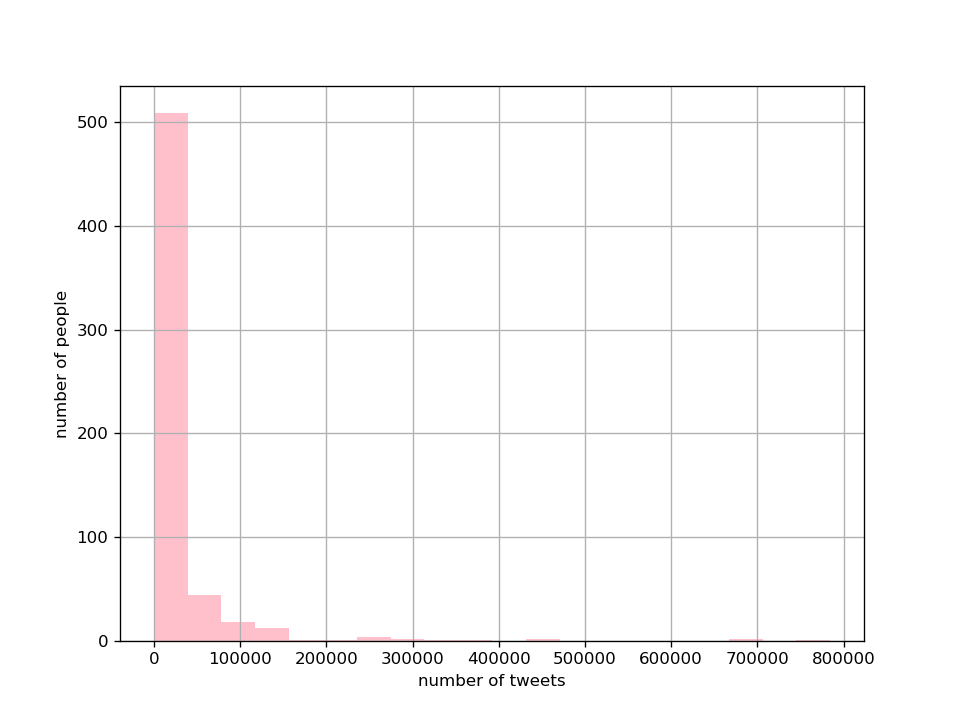

In [15]:
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
##hist of tweets for person ##
x=users['statuses_count']
histo=x.hist(bins=20,color='pink')
histo.set_ylabel('number of people')
histo.set_xlabel('number of tweets')
plt.show()


<IPython.core.display.Javascript object>


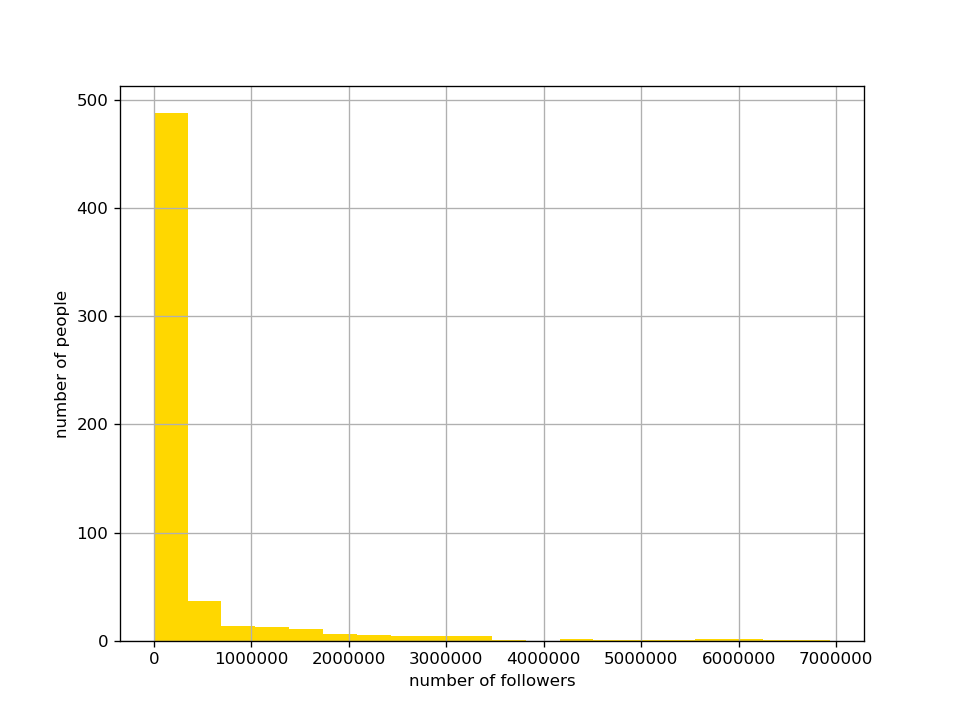

In [16]:
## hist for followers per person ##
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
y=users['followers_count']
histo2=y.hist(bins=20,color='gold')
histo2.set_ylabel('number of people')
histo2.set_xlabel('number of followers')
histo2.ticklabel_format(useOffset=False, style='plain')
plt.show()

<IPython.core.display.Javascript object>


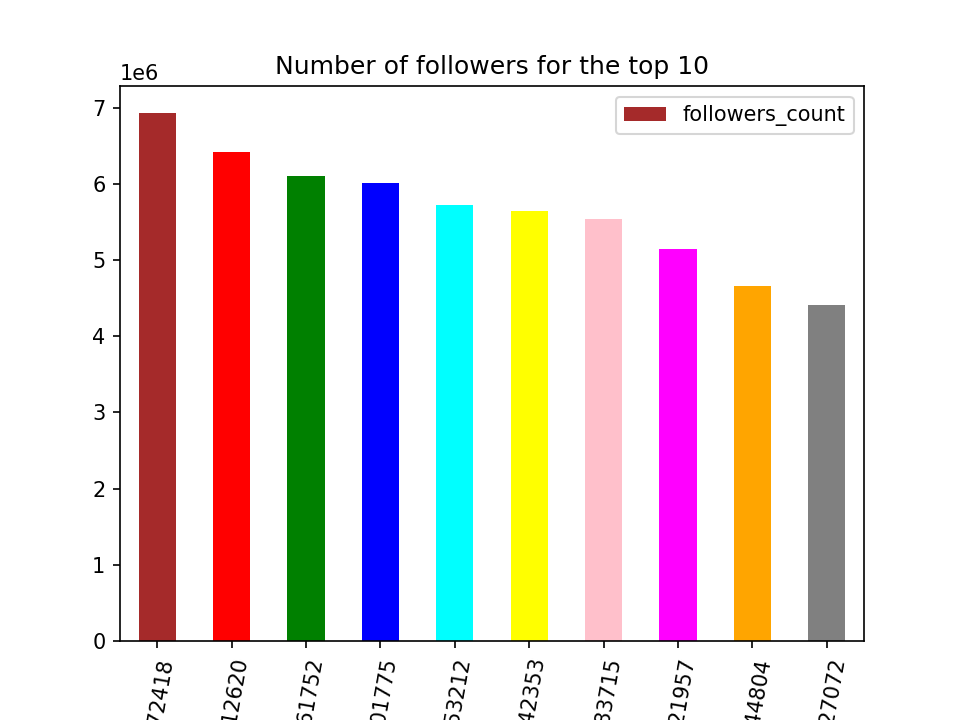

In [17]:
from matplotlib.pyplot import figure
## top 10 users with the highest number of followers on twitter#
df1 = users[['user_id','followers_count']].sort_values('followers_count',ascending = False).head(10)

plot_bar=df1.plot.bar(x="user_id", y="followers_count", rot=80, title="Number of followers for the top 10",color=['brown', 'red', 'green', 'blue', 'cyan',"yellow","pink","magenta","orange","gray"])
plt.show()

<IPython.core.display.Javascript object>


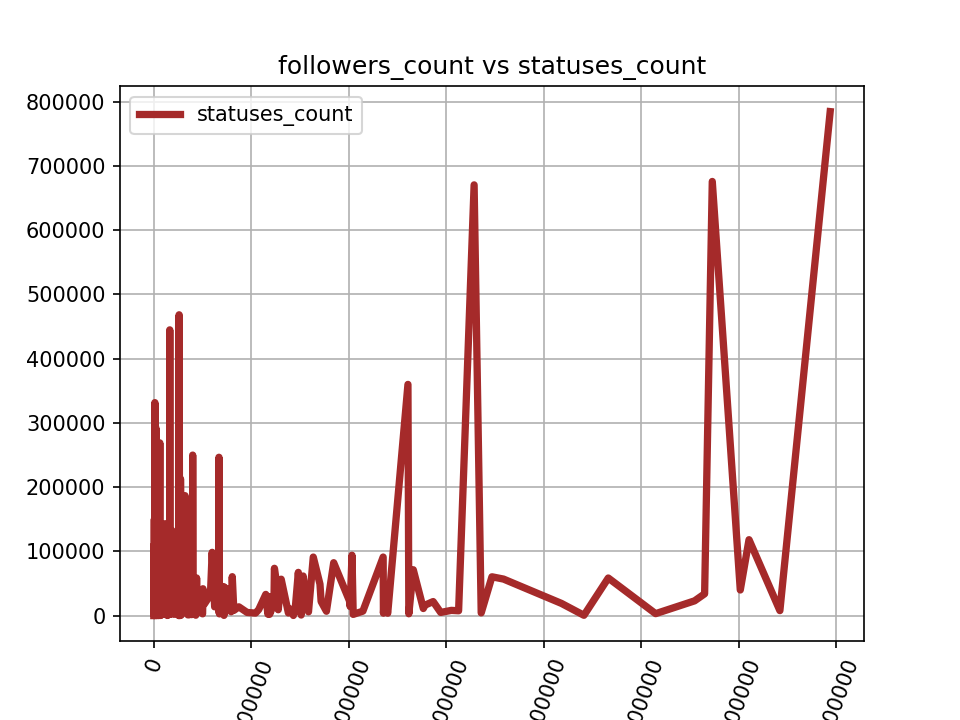

In [18]:
from matplotlib.pyplot import figure
df2 = users[['statuses_count','followers_count']].sort_values('followers_count',ascending = False)
## plot of the number of followers according to status count#
plot_line=df2.plot(x="followers_count", y="statuses_count", rot=70, title="followers_count vs statuses_count",c='brown',linewidth=3.5)
plot_line.ticklabel_format(useOffset=False, style='plain')
plot_line.grid() 



plt.show()

In [19]:
## export the new dataframes to csv ##
tweets_mothly_summary.to_csv('tweets_mothly_summary.csv',index=False ,encoding="utf-8-sig") ## make it in csv ##
users.to_csv('users.csv',index=False ,encoding="utf-8-sig") ## make it in csv ##
tweets.to_csv('tweets.csv',index=False ,encoding="utf-8-sig") ## make it in csv ##